### Bu proje, MNIST veri seti kullanılarak el yazısı rakamları tanımak için bir yapay zeka modelini eğitir.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')

In [8]:
# 70000 satır 784 sütun olması lazım
mnist.data.shape

(70000, 784)

In [22]:
# Mniset veriseti içerisindeki rakamları gösteren fonksiyon
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

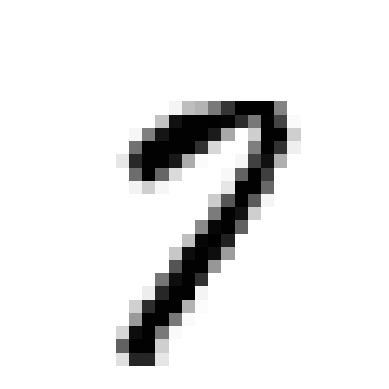

In [30]:
# 10000. fotoğrafa bakalım
showimage(mnist.data, 9999)

In [32]:
# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [34]:
# train_img kopyalıyoruz değiştireceğimiz için
test_img_copy = test_img.copy()

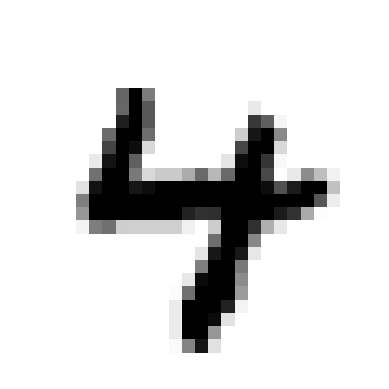

In [38]:
showimage(test_img_copy, 15)

In [42]:
# Verileri scale ediyorum
# Veriler scale edilmezse PCA hatalı sonuçlar verebilir

scaler = StandardScaler()

# Scaler'ı sadece trainin set üzerinde fit etmemiz yeterli
scaler.fit(train_img)

# Transform işlemini hem training sete hem de test sete yapmamız gerekiyor
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [44]:
# PCA uyguluyorum
# Variance'nin %93 oranında korunmasını istediğimi belirtiyorum
pca = PCA(.93)

In [46]:
# PCA sadece training set e yapıyorum
pca.fit(train_img)

PCA(n_components=0.93)

In [50]:
# 784 companent'i kaça düşürmüş onu görelim
print(pca.n_components_)

281


In [52]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'e düşürelim
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [54]:
# 2. Makine öğrenme modelimiz Logistic Regression modelini PCA işleminden geçirilmiş veri setinin üzerinde çalışacağım

#'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyorum.
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [58]:
# LogisticRegression modelini train datasını kullanarak eğitiyorum
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

#### El yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekleştirme

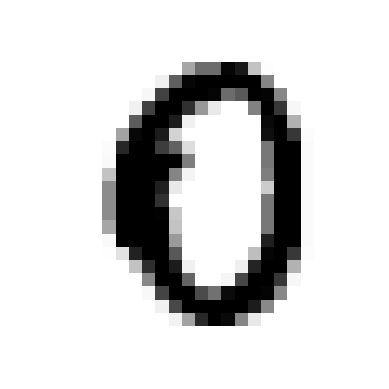

In [125]:
# verisetimizden ilk veriyi getiriyoruz 
showimage(test_img_copy, 0)

In [127]:
# ilk verimiz sıfırmış. Bu veriyi yapay zeka modelimize soruyoruz
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [129]:
# sıfırı doğru bildi şimdi diğer verilerle deniyelim

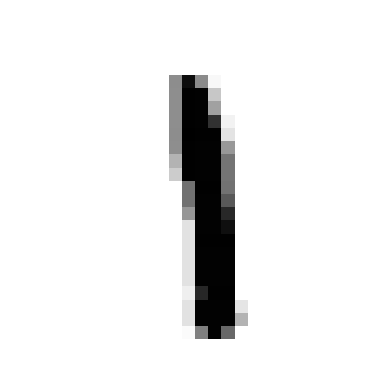

In [133]:
showimage(test_img_copy, 2)

In [135]:
logisticRegr.predict(test_img[2].reshape(1,-1))

array(['1'], dtype=object)

In [140]:
# 1 i de doğru bildi. şimdi 2 yi soralım

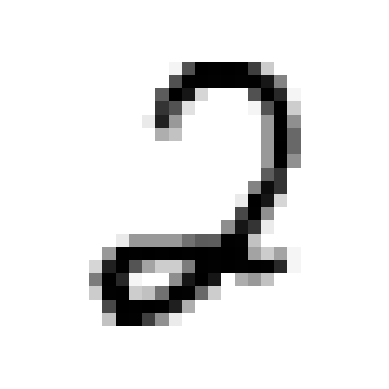

In [148]:
showimage(test_img_copy, 3)

In [150]:
logisticRegr.predict(test_img[3].reshape(1,-1))

array(['2'], dtype=object)

In [152]:
# 2 yi de doğru bildi şimdi 3 ü deneyelim

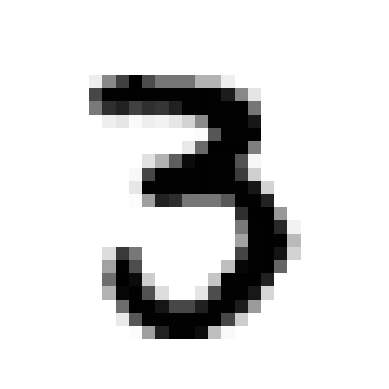

In [154]:
showimage(test_img_copy, 11)

In [156]:
logisticRegr.predict(test_img[11].reshape(1,-1))

array(['3'], dtype=object)

In [158]:
# 3 de doğrulandı sıra 4 te

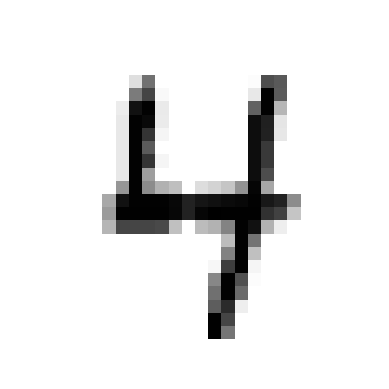

In [160]:
showimage(test_img_copy, 1)

In [162]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

In [164]:
# 4 de doğru sıra 5 de

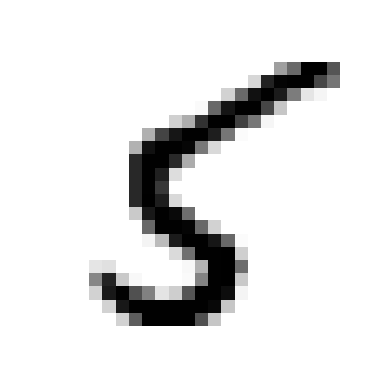

In [214]:
showimage(test_img_copy, 6513)

In [216]:
logisticRegr.predict(test_img[6513].reshape(1,-1))

array(['5'], dtype=object)

In [218]:
# 5 de doğru, 6 ya bakalım

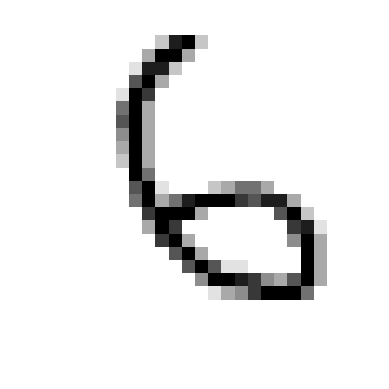

In [170]:
showimage(test_img_copy, 14)

In [172]:
logisticRegr.predict(test_img[14].reshape(1,-1))

array(['6'], dtype=object)

In [220]:
# 6 da doğru, 7 ye bakalım

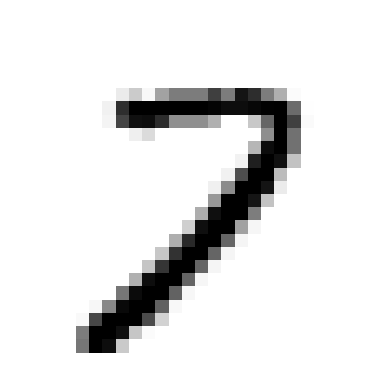

In [224]:
showimage(test_img_copy, 17)

In [226]:
logisticRegr.predict(test_img[17].reshape(1,-1))

array(['7'], dtype=object)

In [228]:
# 7 de doğru 8 e bakalım

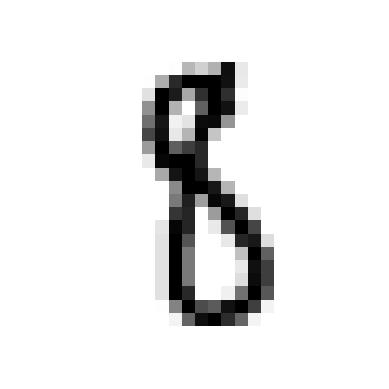

In [278]:
showimage(test_img_copy, 105)

In [280]:
logisticRegr.predict(test_img[105].reshape(1,-1))

array(['8'], dtype=object)

In [282]:
# 8 de doğru 9 a bakalım

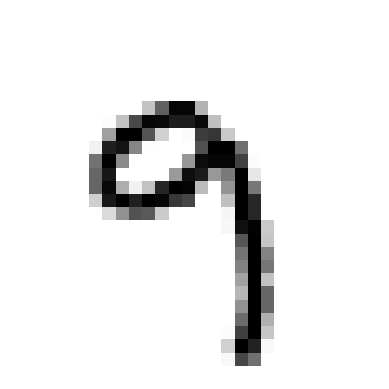

In [238]:
showimage(test_img_copy, 42)

In [240]:
logisticRegr.predict(test_img[42].reshape(1,-1))

array(['9'], dtype=object)

In [286]:
# Modelin doğruluk oranını (accuracy) ölçelim
logisticRegr.score(test_img, test_lbl)

0.9203